# notebooks/01_Data_Ingestion_and_Initial_EDA.ipynb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add parent directory to path to import modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from scripts.data_ingestion import DataIngestion
from scripts.data_cleaning import DataCleaner

# --- Initialize Data Ingestion and Cleaning Utilities ---
ingestor = DataIngestion()
cleaner = DataCleaner()

In [3]:
# --- 1. Load Data ---
print("Loading E-commerce Fraud Data...")
fraud_df_raw = ingestor.load_fraud_data()

print("\nLoading IP to Country Mapping Data...")
ip_to_country_df_raw = ingestor.load_ip_to_country_data()

print("\nLoading Bank Transaction Fraud Data...")
creditcard_df_raw = ingestor.load_creditcard_data()

Loading E-commerce Fraud Data...
✅ 'Fraud_Data.csv' loaded successfully from 'd:\EsH\KAIM\week89\fraud-detection-ml\data\raw\Fraud_Data.csv'

Loading IP to Country Mapping Data...
✅ 'IpAddress_to_Country.csv' loaded successfully from 'd:\EsH\KAIM\week89\fraud-detection-ml\data\raw\IpAddress_to_Country.csv'

Loading Bank Transaction Fraud Data...
✅ 'creditcard.csv' loaded successfully from 'd:\EsH\KAIM\week89\fraud-detection-ml\data\raw\creditcard.csv'


In [4]:

# --- 2. Initial Data Overview (E-commerce Fraud Data) ---
print("\n--- E-commerce Fraud Data Overview ---")
if fraud_df_raw is not None:
    print("Shape:", fraud_df_raw.shape)
    print("\nFirst 5 rows:")
    print(fraud_df_raw.head())
    print("\nInfo:")
    fraud_df_raw.info()
    print("\nDescriptive Statistics:")
    print(fraud_df_raw.describe(include='all'))

    print("\nMissing Values (E-commerce Fraud Data):")
    print(fraud_df_raw.isnull().sum()[fraud_df_raw.isnull().sum() > 0])

    print("\nClass Distribution (E-commerce Fraud Data):")
    print(fraud_df_raw['class'].value_counts(normalize=True) * 100)



--- E-commerce Fraud Data Overview ---
Shape: (151112, 11)

First 5 rows:
   user_id          signup_time        purchase_time  purchase_value  \
0    22058  2015-02-24 22:55:49  2015-04-18 02:47:11              34   
1   333320  2015-06-07 20:39:50  2015-06-08 01:38:54              16   
2     1359  2015-01-01 18:52:44  2015-01-01 18:52:45              15   
3   150084  2015-04-28 21:13:25  2015-05-04 13:54:50              44   
4   221365  2015-07-21 07:09:52  2015-09-09 18:40:53              39   

       device_id source browser sex  age    ip_address  class  
0  QVPSPJUOCKZAR    SEO  Chrome   M   39  7.327584e+08      0  
1  EOGFQPIZPYXFZ    Ads  Chrome   F   53  3.503114e+08      0  
2  YSSKYOSJHPPLJ    SEO   Opera   M   53  2.621474e+09      1  
3  ATGTXKYKUDUQN    SEO  Safari   M   41  3.840542e+09      0  
4  NAUITBZFJKHWW    Ads  Safari   M   45  4.155831e+08      0  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 

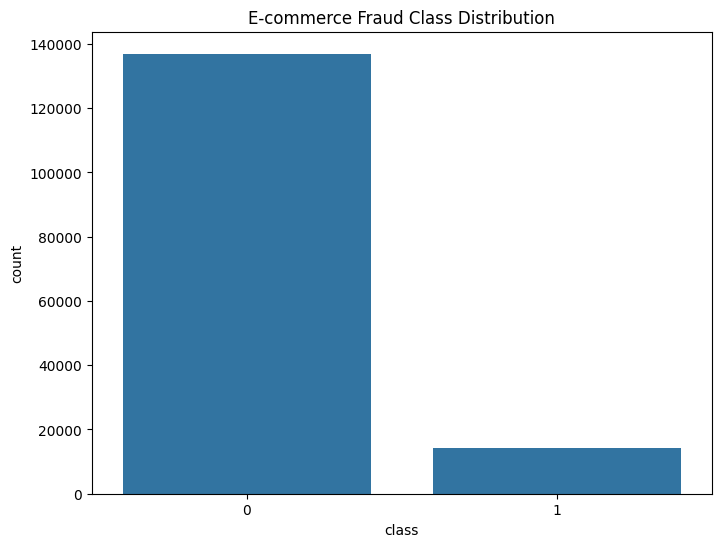

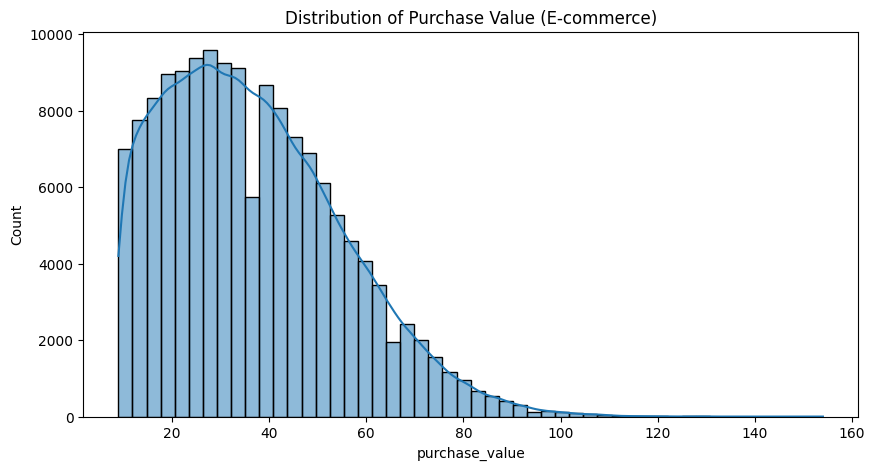

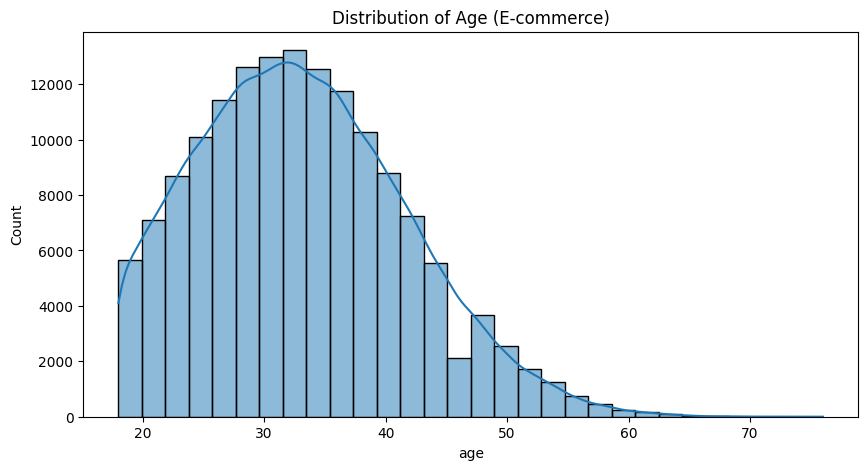

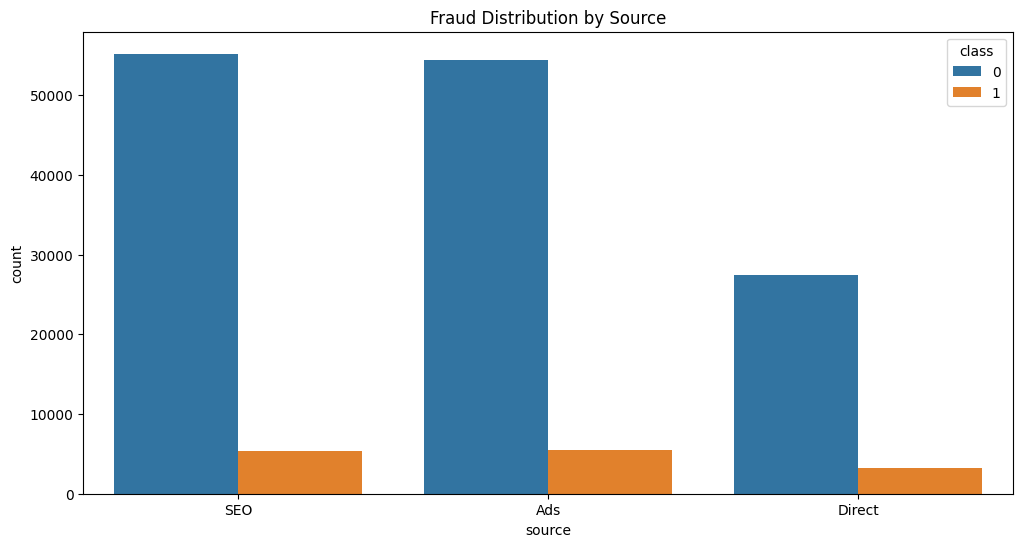

In [6]:
 # --- 3. Initial Visualizations (E-commerce Fraud Data) ---
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=fraud_df_raw)
plt.title('E-commerce Fraud Class Distribution')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(fraud_df_raw['purchase_value'], bins=50, kde=True)
plt.title('Distribution of Purchase Value (E-commerce)')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(fraud_df_raw['age'], bins=30, kde=True)
plt.title('Distribution of Age (E-commerce)')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='source', hue='class', data=fraud_df_raw)
plt.title('Fraud Distribution by Source')
plt.show()

In [7]:

# --- 4. Initial Data Overview (Bank Transaction Fraud Data) ---
print("\n--- Bank Transaction Fraud Data Overview ---")
if creditcard_df_raw is not None:
    print("Shape:", creditcard_df_raw.shape)
    print("\nFirst 5 rows:")
    print(creditcard_df_raw.head())
    print("\nInfo:")
    creditcard_df_raw.info()
    print("\nDescriptive Statistics:")
    print(creditcard_df_raw.describe(include='all'))

    print("\nMissing Values (Bank Transaction Fraud Data):")
    print(creditcard_df_raw.isnull().sum()[creditcard_df_raw.isnull().sum() > 0])

    print("\nClass Distribution (Bank Transaction Fraud Data):")
    print(creditcard_df_raw['Class'].value_counts(normalize=True) * 100)


--- Bank Transaction Fraud Data Overview ---
Shape: (284807, 31)

First 5 rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.00

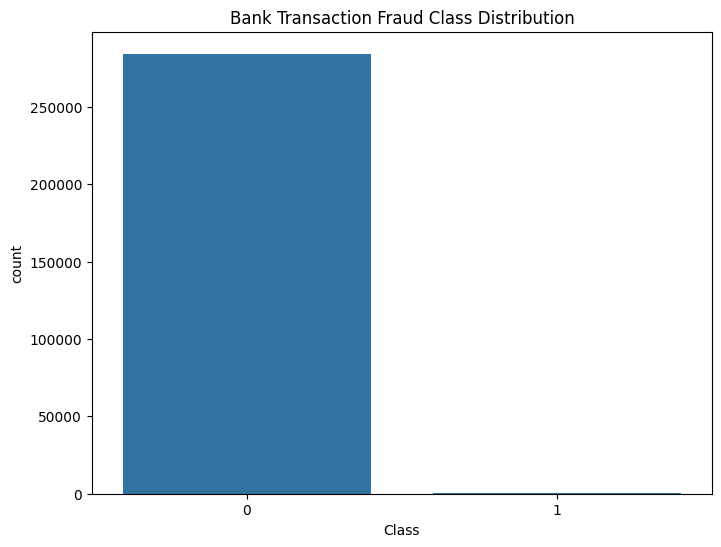

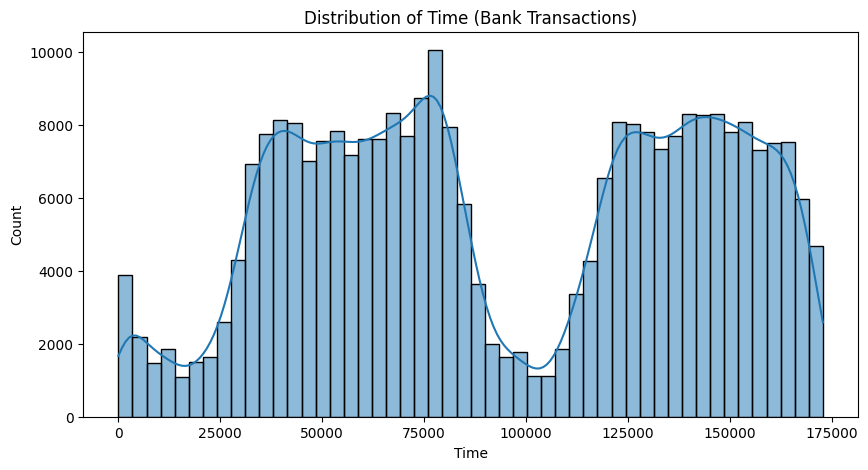

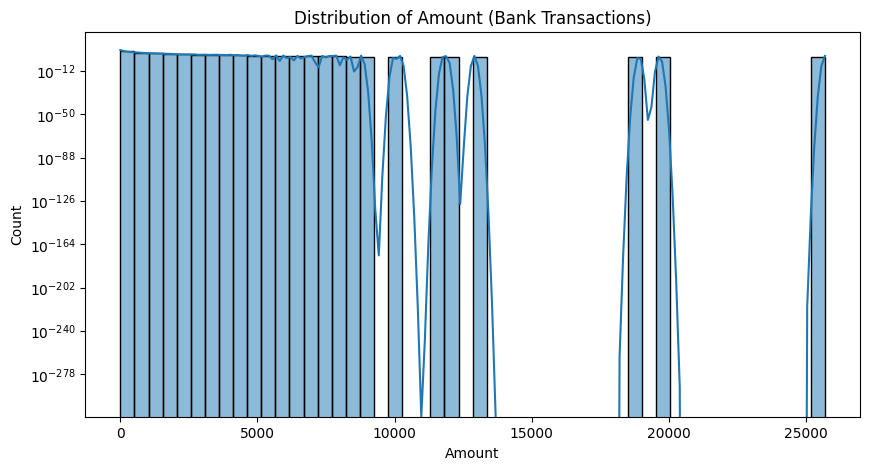

In [8]:
# --- 5. Initial Visualizations (Bank Transaction Fraud Data) ---
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=creditcard_df_raw)
plt.title('Bank Transaction Fraud Class Distribution')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(creditcard_df_raw['Time'], bins=50, kde=True)
plt.title('Distribution of Time (Bank Transactions)')
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(creditcard_df_raw['Amount'], bins=50, kde=True)
plt.title('Distribution of Amount (Bank Transactions)')
plt.yscale('log') # Log scale for better visualization due to skewed distribution
plt.show()



In [9]:
print("\nInitial EDA complete. Proceed to Feature Engineering and Advanced EDA.")


Initial EDA complete. Proceed to Feature Engineering and Advanced EDA.
